In this notebook, the following models are used.
1. Linear Regression
2. Decision Tree
3. Random Forest
4. Lasso Regression
5. Ridge Regression
6. ElasticNet Regression
7. SVR



I have also used **Grid Search** for HyperParameter Tuning.

I have also done scaling of the dataset with **StandardScaler and MinMaxScaler**.

I have evaluated model thrice.

1. Evaluating models without Scaling
2. Evaluating models with Standard Scaling
3. Evaluating models with MinMax Scaling


The result of the lowest RMSE values are attached at the end in the form of DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [3]:
df.shape

(500, 9)

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.drop(['Serial No.'], axis = 1, inplace = True)

Serial Number can be dropped here as it used for indexing and it shows no relationship with 'Chance of Admit '.

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# DATA ANALYSIS

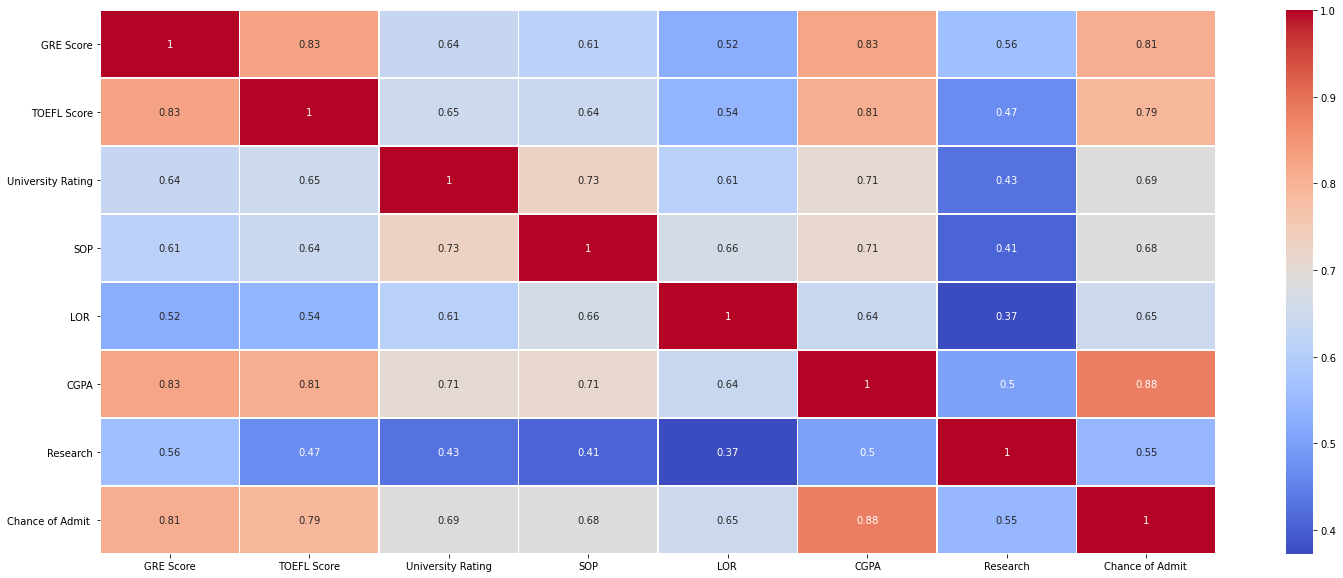

In [8]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

**This shows the correlation between several features.**

1. Chance of Admit increases with GRE Score, TOEFL Score and CGPA.
2. Chance of Admit is also dependent on University Rating, SOP and LOR.Atlhough, the dependency is relatively less than GRE, TOEFL and CGPA.
3. Chance of Admit is moderately dependent on Research. 

**Correlation is positive here for majority of the features. This means as the Value for a certain feature increases, the Chance of Admit also increases. They are lineraly dependent on each other. Generally, when correlation is 0, it means that there is no relationship between the two features you are looking at.**

1 shows high dependece. Values near to -1 shows inverse relationship.

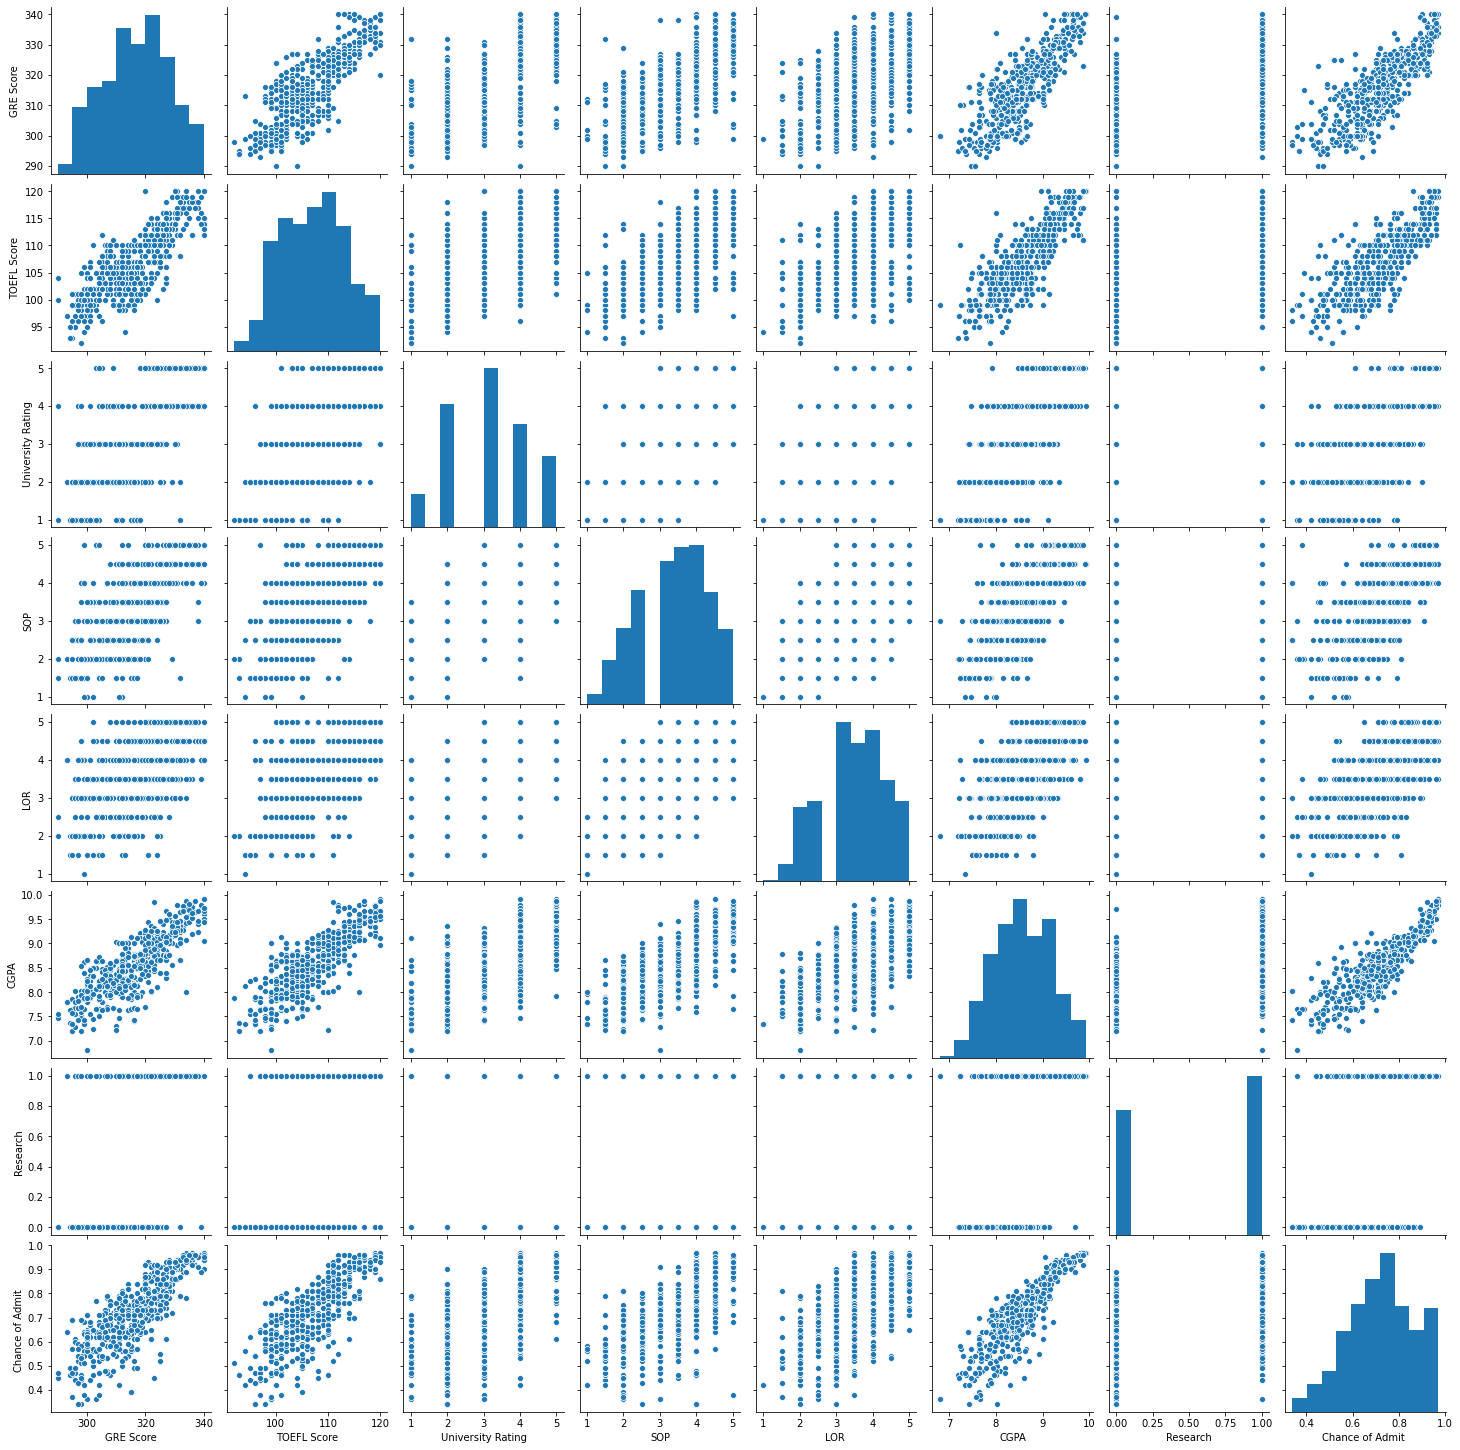

In [9]:
sns.pairplot(df)

This shows the relationship between all the features in the form of ScatterPlot.

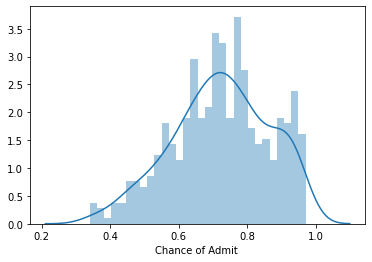

In [10]:
x = df['Chance of Admit ']
sns.distplot(x , kde= True,rug = False, bins = 30)

Most of the students have an Admit Chance of 0.6-0.8 when they fulfill certain criterias.

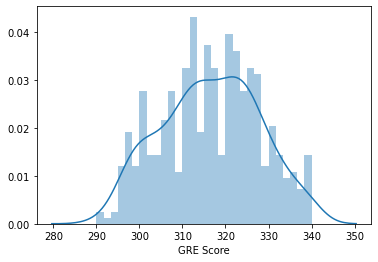

In [11]:
x = df['GRE Score']
sns.distplot(x , kde= True,rug = False, bins = 30)

The GRE Scores are distributed across many Scores. They start at 290 and maximizes at around 310-325 and then decreases for majority of the students.

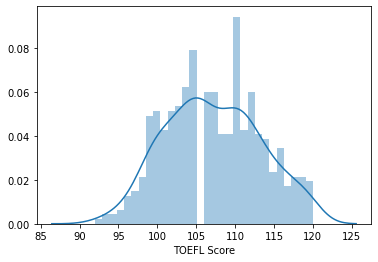

In [12]:
x = df['TOEFL Score']
sns.distplot(x , kde= True,rug = False, bins = 30)

Maximum students have TOEFL Score between 100 and 110 with peak at 105

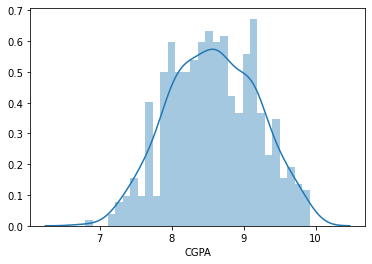

In [13]:
x = df['CGPA']
sns.distplot(x , kde= True,rug = False, bins = 30)

Maximum of the students have a CPGA between 8 and 9 with peak around 8.5

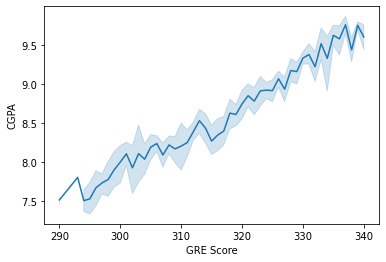

In [14]:
sns.lineplot(x = 'GRE Score', y = 'CGPA', data = df)

This shows a linear relationship between CPGA and GRE Score.

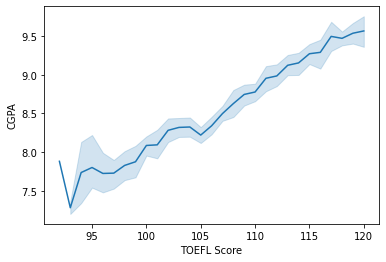

In [15]:
sns.lineplot(x = 'TOEFL Score', y = 'CGPA', data = df)

This shows a linear relationship between CGPA and TOEFL Score.

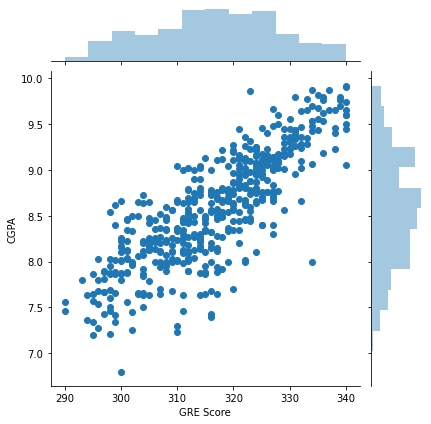

In [16]:
sns.jointplot(x = 'GRE Score', y = 'CGPA', data=df)

The students having higher CGPA also have high GRE Scores. Most of the students have a CGPA of 8.5 and GRE Score from the range of 310-330

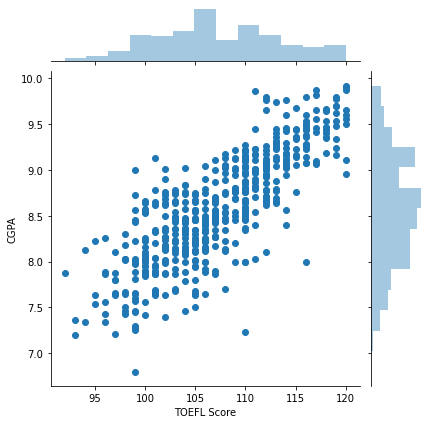

In [17]:
sns.jointplot(x = 'TOEFL Score', y = 'CGPA', data=df)

Students having good CGPA also have a good score in TOEFL.


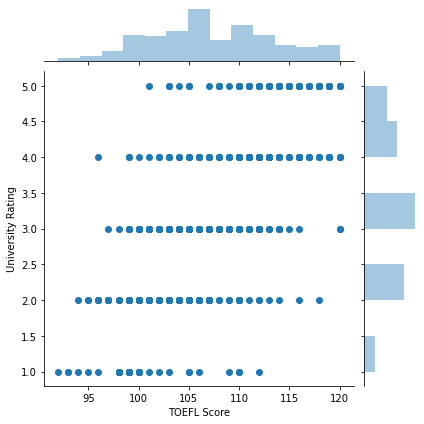

In [18]:
sns.jointplot(x = 'TOEFL Score', y = 'University Rating', data=df)

The TOEFL scores are also a bit higher for the students from higher rated Universities. 

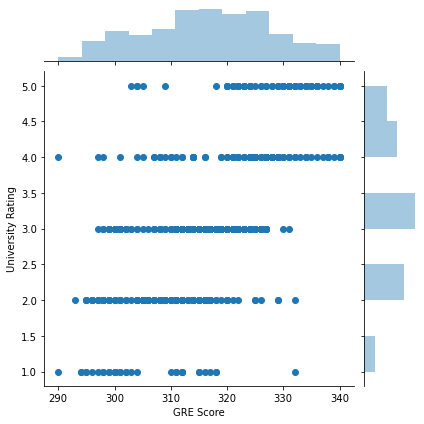

In [19]:
sns.jointplot(x = 'GRE Score', y = 'University Rating', data=df)

GRE scores are much better for students from Higher rated Universities.

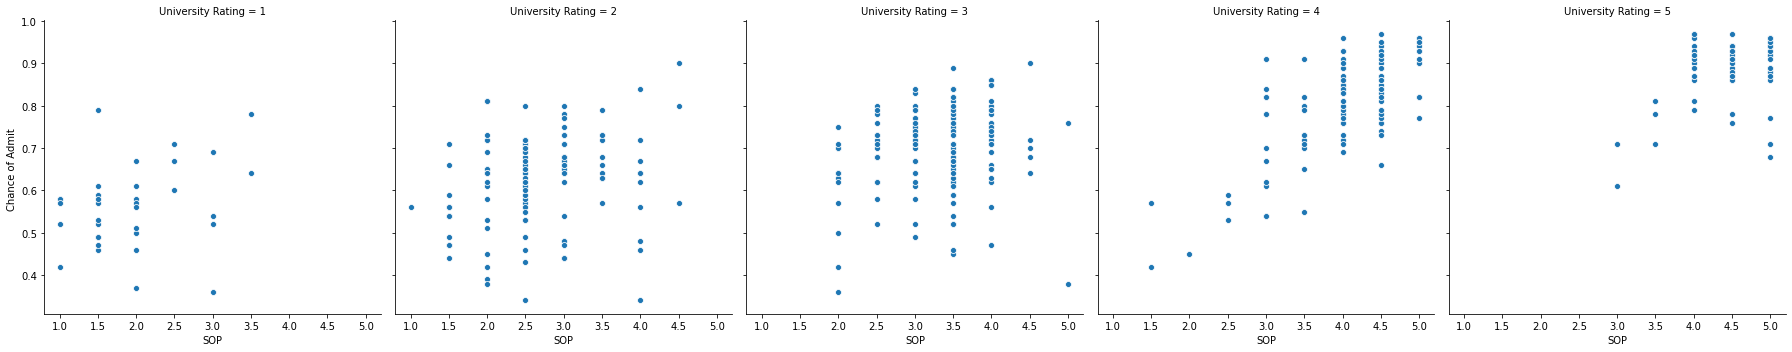

In [20]:
sns.relplot(x ='SOP', y ='Chance of Admit ', col = 'University Rating', data = df, estimator = None,palette = 'ch:r = -0.8, l = 0.95')

Higher number of admits are there for SOP from Univesitites having rating 4 and 5. This gradually declines as ratings go down.

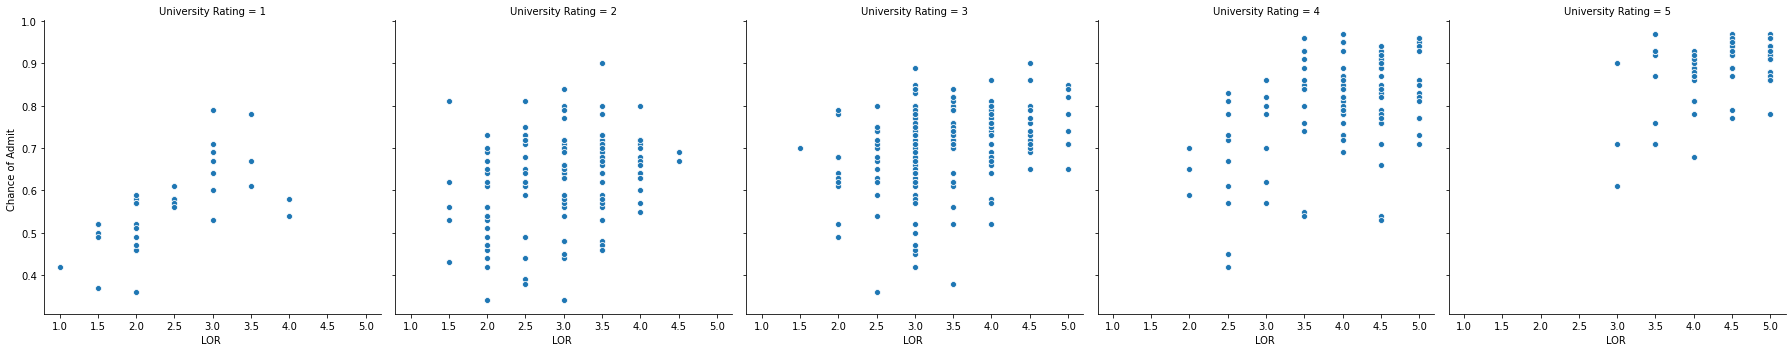

In [21]:
sns.relplot(x ='LOR ', y ='Chance of Admit ', col = 'University Rating', data = df, estimator = None,palette = 'ch:r = -0.8, l = 0.95')

The higher the University Rating, the better is the LOR and the chances of admit are better.

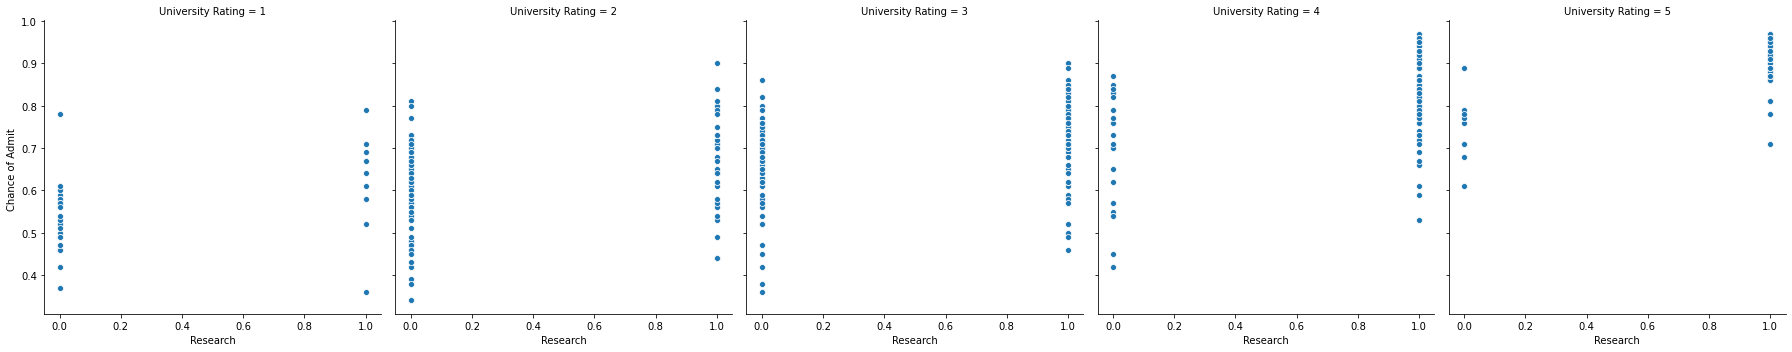

In [22]:
sns.relplot(x ='Research', y ='Chance of Admit ', col = 'University Rating', data = df, estimator = None,palette = 'ch:r = -0.8, l = 0.95')

As the University Rating increases so does the Research and this increases the Chance of Admit.

# MODEL SELECTION


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


from sklearn_pandas import DataFrameMapper
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [24]:
X = df.drop(['Chance of Admit '], axis = 1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [25]:
y = df['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,shuffle = False)

**Shuffle = False means that values are not randomized and used as they are given in the .CSV file. The first 400 values are used for Training and the last 100 for testing/CV.** 


**1.) LINEAR REGRESSION WITHOUT SCALING**

In [27]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

accuracy1 = model1.score(X_test,y_test)
print(accuracy1*100,'%')

89.8286909853386 %


**1.a) RMSE VALUE FOR LINEAR REGRESSION WITHOUT SCALING**

In [28]:
y_pred1 = model1.predict(X_test)

val = mean_squared_error(y_test, y_pred1, squared=False)
val1 = str(round(val, 4))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Root Mean Squared Error: 0.04293220746251859


**2.) DECISION TREE WITHOUT SCALING**

In [29]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

accuracy2 = model2.score(X_test,y_test)
print(accuracy2*100,'%')

55.30124477755746 %


**2.a) DECISION TREE RMSE WITHOUT SCALING**

In [30]:
y_pred2 = model2.predict(X_test)

val = mean_squared_error(y_test, y_pred2, squared=False)
val2 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))


Root Mean Squared Error: 0.09000000000000001


**3.) GRID SEARCH FOR N_ESTIMATORS VALUE**

In [31]:
n_estimators = [10, 40, 70, 100, 130, 160, 190, 220, 250, 270]

RF = RandomForestRegressor()

parameters = {'n_estimators': [10, 40, 70, 100, 130, 160, 190, 220, 250, 270]}

RFR = GridSearchCV(RF, parameters,scoring='neg_mean_squared_error', cv=5)

RFR.fit(X_train, y_train)

RFR.best_params_


{'n_estimators': 220}

**3.a) RANDOM FOREST WITHOUT SCALING**

In [32]:
model3 = RandomForestRegressor(n_estimators = 190)
model3.fit(X_train, y_train)

accuracy3 = model3.score(X_test,y_test)
print(accuracy3*100,'%')

86.27087722958814 %


**3.b) RANDOM FOREST RMSE WITHOUT SCALING**

In [33]:
y_pred3 = model3.predict(X_test)

val = mean_squared_error(y_test, y_pred3, squared=False)
val3 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))


Root Mean Squared Error: 0.0498788221343179


**4.) GRID SEARCH FOR ALPHA FOR LASSO REGRESSION**

In [34]:
lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 100)

lasso_regressor.fit(X_train, y_train)

lasso_regressor.best_params_

{'alpha': 0.001}

**4.b) LASSO REGRESSION WITHOUT SCALING**

In [35]:
model4 = linear_model.Lasso(alpha=.001)
model4.fit(X_train,y_train)

accuracy4 = model4.score(X_test,y_test)
print(accuracy4*100,'%')

90.09187221342198 %


**4.c) RMSE FOR LASSO REGRESSION**

In [36]:
y_pred4 = model4.predict(X_test)

val= mean_squared_error(y_test, y_pred4, squared=False)
val4 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))


Root Mean Squared Error: 0.042373134783751154


**5.a) GRID SEARCH FOR ALPHA FOR RIDGE REGRESSION**

In [37]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=100)

ridge_regressor.fit(X_train, y_train)
ridge_regressor.best_params_

{'alpha': 1}

**5.b) RIDGE REGRESSION WITHOUT SCALING**

In [38]:
model5 = linear_model.Ridge(alpha=1)
model5.fit(X_train,y_train)

accuracy5 = model5.score(X_test,y_test)
print(accuracy5*100,'%')

89.84678625586992 %


**5.c) RMSE FOR RIDGE REGRESSION**

In [39]:
y_pred5 = model5.predict(X_test)

val = mean_squared_error(y_test, y_pred5, squared=False)
val5 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))


Root Mean Squared Error: 0.04289400118357367


**6.A) GRID SEARCH FOR ELASTICNET REGRESSION**

In [40]:
Elasticnet = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

en_regressor = GridSearchCV(Elasticnet, parameters, scoring='neg_mean_squared_error', cv = 100)

en_regressor.fit(X_train, y_train)
en_regressor.best_params_

{'alpha': 0.001}

**6.B) ELASTICNET REGRESSION WITHOUT SCALING**

In [41]:
model6 = linear_model.ElasticNet(alpha=0.001)
model6.fit(X_train,y_train)

accuracy6 = model6.score(X_test,y_test)
print(accuracy6*100,'%')

90.14111334660112 %


**6.C) RMSE VALUE FOR ELASTICNET REGRESSION**

In [42]:
y_pred6 = model6.predict(X_test)

val = mean_squared_error(y_test, y_pred6, squared=False)
val6 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))


Root Mean Squared Error: 0.04226771123459417


In [43]:
data1 = [['Linear Regression ',val1],['Decision Tree',val2],['Random Forest',val3],['Lasso Regression',val4],['Ridge Regression',val5],['ElasticNet Regression',val6]]
d1 = pd.DataFrame(data1,columns = ['Without Scaling Models ','RMSE Error'])
Half1RMSE = d1.copy()
Half1RMSE


,Without Scaling Models,RMSE Error
0,Linear Regression,0.0429
1,Decision Tree,0.09
2,Random Forest,0.0499
3,Lasso Regression,0.0424
4,Ridge Regression,0.0429
5,ElasticNet Regression,0.0423


# APPLYING STANDARD SCALER TO DATASET

In [44]:
mapper = DataFrameMapper([(df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df.copy(), 4)
data = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [45]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


In [46]:
x = data.drop(['Chance of Admit '], axis = 1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


In [47]:
Y = data['Chance of Admit ']
Y

0      1.406107
1      0.271349
2     -0.012340
3      0.555039
4     -0.508797
         ...   
495    1.051495
496    1.689797
497    1.477030
498    0.058582
499    0.838728
Name: Chance of Admit , Length: 500, dtype: float64

In [48]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.20,shuffle = False)

**Shuffle = False means that values are not randomized and used as they are given in the .CSV file. The first 400 values are used for Training and the last 100 for testing/CV.** 

**7.A) LINEAR REGRESSION WITH SCALING**

In [49]:
model7 = LinearRegression()
model7.fit(x_train, Y_train)

accuracy7 = model7.score(x_test,Y_test)
print(accuracy7*100,'%')

89.82869098533861 %


**7.B) RMSE VALUE FOR LINEAR REGRESSION WITH SCALING**

In [50]:
y_pred7 = model7.predict(x_test)

val = mean_squared_error(Y_test, y_pred7, squared=False)
val7 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred7)))


Root Mean Squared Error: 0.304485483766528


**8.A) DECISION TREE WITH SCALING**

In [51]:
model8 = DecisionTreeRegressor()
model8.fit(x_train, Y_train)

accuracy8 = model8.score(x_test,Y_test)
print(accuracy8*100,'%')

60.024965082546466 %


**8.B) RMSE VALUE FOR DECISION TREE WITH SCALING**

In [52]:
y_pred8 = model8.predict(x_test)

val = mean_squared_error(Y_test, y_pred8, squared=False)
val8 = str(round(val, 4))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred8)))


Root Mean Squared Error: 0.6036324717181981


**9.A) GRID SEARCH FOR N_ESTIMATORS FOR RANDOM FOREST WITH SCALING**

In [53]:
n_estimators = [10, 40, 70, 100, 130, 160, 190, 220, 250, 270]

rf = RandomForestRegressor()

parameters = {'n_estimators': [10, 40, 70, 100, 130, 160, 190, 220, 250, 270]}

rfr = GridSearchCV(rf, parameters,scoring='neg_mean_squared_error', cv=10)

rfr.fit(x_train, Y_train)

rfr.best_params_

{'n_estimators': 270}

**9.B) RANDOM FOREST WITH SCALING**

In [54]:
model9 = RandomForestRegressor(n_estimators = 220)
model9.fit(x_train, Y_train)

accuracy9 = model9.score(x_test,Y_test)
print(accuracy9*100,'%')

85.35325158087129 %


**9.C) RMSE VALUE FOR RANDOM FOREST WITH SCALING**

In [55]:
y_pred9 = model9.predict(x_test)

val = mean_squared_error(Y_test, y_pred9, squared=False)
val9 = str(round(val, 4))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred9)))


Root Mean Squared Error: 0.36538337179516434


**10.A) GRID SEARCH FOR ALPHA FOR LASSO REGRESSION WITH SCALING**

In [56]:
L = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

LR = GridSearchCV(L, parameters, scoring='neg_mean_squared_error', cv = 100)

LR.fit(x_train, Y_train)
LR.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21373173490189856, tolerance: 0.040709974242410844
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45477111303264905, tolerance: 0.039716343762835435
  positive)


{'alpha': 0.01}

**10.B) LASSO REGRESSION WITH SCALING**

In [57]:
model10 = linear_model.Lasso(alpha=.01)
model10.fit(x_train,Y_train)

accuracy10 = model10.score(x_test,Y_test)
print(accuracy10*100,'%')

90.16400068993364 %


**10.C) RMSE FOR LASSO REGRESSION WITH SCALING**

In [58]:
y_pred10 = model10.predict(x_test)

val = mean_squared_error(Y_test, y_pred10, squared=False)
val10 = str(round(val, 4))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred10)))


Root Mean Squared Error: 0.2994245551647059


**11.A) GRID SEARCH FOR ELASTICNET REGRESSION WITH SCALING**

In [59]:
EN = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ENR = GridSearchCV(Elasticnet, parameters, scoring='neg_mean_squared_error', cv = 100)

ENR.fit(x_train, Y_train)
ENR.best_params_

{'alpha': 0.01}

**11.B) ELASTICNET REGRESSION WITH SCALING**

In [60]:
model11 = linear_model.Lasso(alpha=.01)
model11.fit(x_train,Y_train)

accuracy11 = model11.score(x_test,Y_test)
print(accuracy11*100,'%')

90.16400068993364 %


**11.C) RMSE FOR ELASTICNET REGRESSION WITH SCALING**

In [61]:
y_pred11 = model11.predict(x_test)

val = mean_squared_error(Y_test, y_pred11, squared=False)
val11 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred11)))


Root Mean Squared Error: 0.2994245551647059


**12.A) GRID SEARCH FOR SVR WITH SCALING**

In [62]:
SVR = SVR()

parameters = {'C':[.0001 ,.001 ,0.1, 1, 10, 100, 1000],
              'epsilon':[0.001, 0.01, 0.1, 0.5, 1, 2, 4]
             }

ENR = GridSearchCV(SVR, parameters, scoring='neg_mean_squared_error', cv = 10)

ENR.fit(x_train, Y_train)
ENR.best_params_

{'C': 1, 'epsilon': 0.01}

**12.B) SVR WITH SCALING**

In [63]:
from sklearn.svm import SVR
model12 = SVR(C=1, epsilon=0.1)
model12.fit(x_train,Y_train)

model12 = model12.score(x_test,Y_test)
print(model12*100,'%')

86.61777347575455 %


**13.A) GRID SEARCH FOR SCALER RIDGE REGRESSION**

In [64]:
R = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

R = GridSearchCV(R, parameters, scoring='neg_mean_squared_error', cv = 100)

R.fit(x_train, Y_train)
R.best_params_

{'alpha': 10}

**13.B)RIDGE REGRESSION WITH STANDARD SCALER**

In [65]:
model13 = linear_model.Ridge(alpha=10)
model13.fit(x_train,Y_train)

accuracy13 = model13.score(x_test,Y_test)
print(accuracy13*100,'%')

89.93884832327346 %


**13.C)RMSE VALUE FOR STANDARD SCALER RIDGE REGRESSION**

In [66]:
y_pred13 = model13.predict(x_test)

val = mean_squared_error(Y_test, y_pred13, squared=False)
val13 = str(round(val, 4))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred13)))


Root Mean Squared Error: 0.30283217541626345


In [67]:
data2 = [['Scaled Linear Regression',val7],['Scaled Decision Tree',val8],['Scaled Random Forest',val9],['Scaled Lasso Regression',val10],['Scaled Ridge Regression',val13],['Scaled ElasticNet Regression',val11]]
d2 = pd.DataFrame(data2,columns = ['Standard Scaler - Model ','RMSE Error'])
Half2RMSE = d2.copy()


In [68]:
Half2RMSE

,Standard Scaler - Model,RMSE Error
0,Scaled Linear Regression,0.3045
1,Scaled Decision Tree,0.6036
2,Scaled Random Forest,0.3654
3,Scaled Lasso Regression,0.2994
4,Scaled Ridge Regression,0.3028
5,Scaled ElasticNet Regression,0.2994


# **MinMax Scaler Transform**

In [69]:
from pandas import DataFrame
trans = MinMaxScaler()
dat = trans.fit_transform(df)
dataset = DataFrame(dat)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [70]:
dataset.columns = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']


In [71]:
ex = dataset.drop(['Chance of Admit'], axis = 1)
ex

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [72]:
ey = dataset['Chance of Admit']
ey

0      0.920635
1      0.666667
2      0.603175
3      0.730159
4      0.492063
         ...   
495    0.841270
496    0.984127
497    0.936508
498    0.619048
499    0.793651
Name: Chance of Admit, Length: 500, dtype: float64

In [73]:
x_t, x_es, Y_t, Y_es = train_test_split(ex, ey, test_size = 0.20,shuffle = False)

**14.A) LINEAR REGRESSION WITH SCALING**

In [74]:
model14 = LinearRegression()
model14.fit(x_t, Y_t)

accuracy14 = model14.score(x_es,Y_es)
print(accuracy14*100,'%')

89.82869098533862 %


**14.B) RMSE LINEAR REGRESSION FOR MIN MAX SCALER**

In [75]:
y_pred14 = model14.predict(x_es)

val = mean_squared_error(Y_es, y_pred14, squared=False)
val14 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_es, y_pred14)))


Root Mean Squared Error: 0.06814636105161677


**15.A) GRID SEARCH FOR ALPHA FOR LASSO REGRESSION**

In [76]:
l = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lr = GridSearchCV(l, parameters, scoring='neg_mean_squared_error', cv = 100)

lr.fit(x_t, Y_t)
lr.best_params_

{'alpha': 0.001}

**15.B) LASSO REGRESSION FOR MIN MAX SCALER**

In [77]:
model15 = linear_model.Lasso(alpha=.001)
model15.fit(x_t,Y_t)

accuracy15 = model15.score(x_es,Y_es)
print(accuracy15*100,'%')

90.15821209785685 %


**15.C) RMSE VALUE FOR SCALED LASSO REGRESSION**

In [78]:
y_pred15 = model15.predict(x_es)

val = mean_squared_error(Y_es, y_pred15, squared=False)
val15 = str(round(val, 4))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_es, y_pred15)))


Root Mean Squared Error: 0.06703339975351189


**16.A) GRID SEARCH FOR ALPHA FOR RIDGE REGRESSION**

In [79]:
r = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

r = GridSearchCV(r, parameters, scoring='neg_mean_squared_error', cv = 100)

r.fit(x_t, Y_t)
r.best_params_

{'alpha': 0.01}

**16.B) RIDGE REGRESSION FOR MIN MAX SCALER**

In [80]:
model16 = linear_model.Ridge(alpha=0.01)
model16.fit(x_t,Y_t)

accuracy16 = model16.score(x_es,Y_es)
print(accuracy16*100,'%')

89.83257715372783 %


**16.C) RMSE VALUE FOR SCALED MIN MAX SCALER**

In [81]:
y_pred16 = model16.predict(x_es)

val = mean_squared_error(Y_es, y_pred16, squared=False)
val16 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_es, y_pred16)))


Root Mean Squared Error: 0.06813334141302123


**17.A) GRID SEARCH FOR APLHA FOR ELASTICNET**

In [82]:
en = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

enr = GridSearchCV(en, parameters, scoring='neg_mean_squared_error', cv = 100)

enr.fit(x_t, Y_t)
enr.best_params_

{'alpha': 0.001}

**17.B) ELASTICNET REGRESSION FOR MIN MAX SCALER**

In [83]:
model17 = linear_model.Lasso(alpha=.001)
model17.fit(x_t,Y_t)

accuracy17 = model17.score(x_es,Y_es)
print(accuracy17*100,'%')

90.15821209785685 %


**17.C) RMSE VALUE FOR ELASTICNET REGRESSION FOR MIN MAX SCALER**

In [84]:
y_pred17 = model17.predict(x_es)

val = mean_squared_error(Y_es, y_pred17, squared=False)
val17 = str(round(val, 4))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_es, y_pred17)))


Root Mean Squared Error: 0.06703339975351189


**18.A) SCALED DECISION TREE MIN MAX SCALER**

In [85]:
model18 = DecisionTreeRegressor()
model18.fit(x_t, Y_t)

accuracy18 = model18.score(x_es,Y_es)
print(accuracy18*100,'%')

55.70408541104368 %


**18.B) RMSE ERROR FOR SCALED DECISION TREE**


In [86]:
y_pred18 = model18.predict(x_es)

val = mean_squared_error(Y_es, y_pred8, squared=False)
val18 = str(round(val, 4))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_es, y_pred18)))


Root Mean Squared Error: 0.14221194690772457


**19.A) GRID SEARCH FOR RANDOM FOREST MIN MAX SCALER**

In [87]:
n_estimators = [10, 40, 70, 100, 130, 160, 190, 220, 250, 270]

Rf = RandomForestRegressor()

parameters = {'n_estimators': [10, 40, 70, 100, 130, 160, 190, 220, 250, 270]}

Rfr = GridSearchCV(Rf, parameters,scoring='neg_mean_squared_error', cv=10)

Rfr.fit(x_t, Y_t)

Rfr.best_params_

{'n_estimators': 270}

**19.B) MIN MAX SCALER RANDOM FOREST**

In [88]:
model19 = RandomForestRegressor(n_estimators = 100)
model19.fit(x_t, Y_t)

accuracy19 = model19.score(x_es,Y_es)
print(accuracy19*100,'%')

85.91067202095213 %


**19.C) RMSE VALUE FOR MIN MAX SCALER RANDOM FOREST**

In [89]:
y_pred19 = model19.predict(x_es)

val = mean_squared_error(Y_es, y_pred19, squared=False)
val19 = str(round(val, 4))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_es, y_pred19)))


Root Mean Squared Error: 0.08020461989911808


**20.A) GRID SEARCH FOR SVR WITH MIN MAX SCALER**

In [90]:
from sklearn.svm import SVR

Svr = SVR()

parameters = {'C':[.0001 ,.001 ,0.1, 1, 10, 100, 1000],
              'epsilon':[0.001, 0.01, 0.1, 0.5, 1, 2, 4]
             }

Enr = GridSearchCV(Svr, parameters, scoring='neg_mean_squared_error', cv = 10)

Enr.fit(x_t, Y_t)
Enr.best_params_

{'C': 1, 'epsilon': 0.01}

**20.B) SVR WITH MIN MAX SCALER**

In [91]:
from sklearn.svm import SVR
model20 = SVR(C=1, epsilon=0.1)
model20.fit(x_t,Y_t)

model20 = model20.score(x_es,Y_es)
print(model20*100,'%')

85.30458244252617 %


In [92]:
data3 = [['Scaled Linear Regression',val14],['Scaled Lasso Regression',val15],['Scaled Ridge Regression',val16],['Scaled ElasticNet Regression',val17],['Scaled Decision Tree',val18],['Scaled Random Forest',val19]]
d3 = pd.DataFrame(data3,columns = ['Min Max Scaler - Model ','RMSE Error'])
Half3RMSE = d3.copy()
Half3RMSE

,Min Max Scaler - Model,RMSE Error
0,Scaled Linear Regression,0.0681
1,Scaled Lasso Regression,0.067
2,Scaled Ridge Regression,0.0681
3,Scaled ElasticNet Regression,0.067
4,Scaled Decision Tree,1.0092
5,Scaled Random Forest,0.0802


In [93]:
frames = [Half1RMSE,Half2RMSE,Half3RMSE] 
FullRMSE = pd.concat(frames, axis = 1)

In [94]:
FullRMSE

,Without Scaling Models,RMSE Error,Standard Scaler - Model,RMSE Error,Min Max Scaler - Model,RMSE Error
0,Linear Regression,0.0429,Scaled Linear Regression,0.3045,Scaled Linear Regression,0.0681
1,Decision Tree,0.09,Scaled Decision Tree,0.6036,Scaled Lasso Regression,0.067
2,Random Forest,0.0499,Scaled Random Forest,0.3654,Scaled Ridge Regression,0.0681
3,Lasso Regression,0.0424,Scaled Lasso Regression,0.2994,Scaled ElasticNet Regression,0.067
4,Ridge Regression,0.0429,Scaled Ridge Regression,0.3028,Scaled Decision Tree,1.0092
5,ElasticNet Regression,0.0423,Scaled ElasticNet Regression,0.2994,Scaled Random Forest,0.0802


The 1st column represents datasets which have not been scaled and the models are used on them.


The 3rd column 'Standard Scaler - Model' means that StandardScaler library was used on the dataset. The successive RMSE Error are included in the 4th column for the Models.


The 5th column 'Min Max Scaler - Model' means that MinMaxScaler library was used on the dataset. The successive RMSE Error are included in the 6th columns for the Models.



**This shows that LASSO REGRESSION and ELASTICNET REGRESSION has the minimum RMSE for the dataset. Moreover, they both have the same Accuracy which is 90.15 after scaling the dataset**

# Therefore, ElasticNet Regression without Scaler Transform provides the lowest value for RMSE.

**If the notebook was helpful, drop an upvote. Much appreciated and thank you!**